# ObsID : 0827220601, Instru : EPN
First detection of the source **0945070132 - 1**.

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob("*EPN_spectrum_grp.fits")[0])


1 spectrum  in use
 
Spectral Data File: source2_0827220701_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.999e-03 +/- 1.414e-03 (18.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-42
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.569e+04 sec
 Using fit statistic: chi
 Using Background File                source2_0827220701_EPN_background_spectrum.fits
  Background Exposure Time: 2.569e+04 sec
 Using Response (RMF) File            source2_0827220701_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  source2_0827220701_EPN.arf



In [4]:
print(f"Number of counts = {7.999e-03*2.569e+04} cts")

Number of counts = 205.49430999999998 cts


The number of counts exeeds 100 cts, indicating that the Chi-squared test is a good choice for a goodness-of-fit statistic.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     2 channels (1-2) ignored in spectrum #     1
     2 channels (41-42) ignored in spectrum #     1



(-0.5, 854.5, 656.5, -0.5)

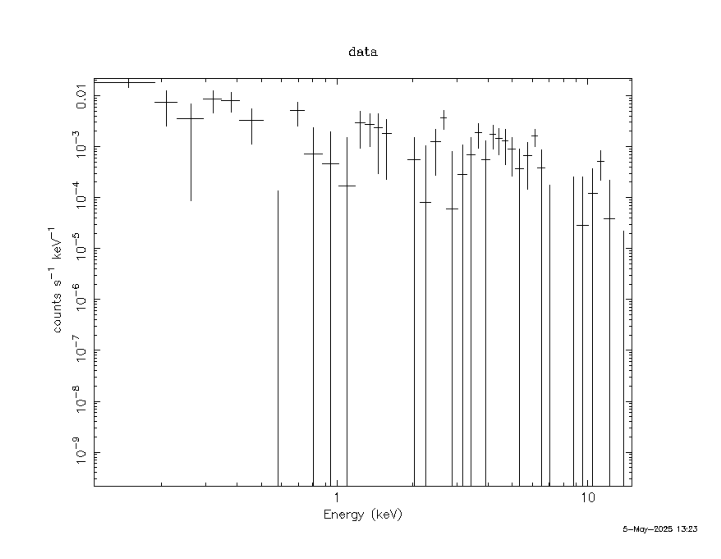

In [6]:
img = plt.imread(glob.glob('*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              6.751886e+12     using 38 bins.

Te

### Bremsstrahlung model

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.489864e+11     using 38 bins.

Test statistic : Chi-Squared              2.489864e+11     using 38 bins.
 Null hypothesis probability of 0.000000e+00 with 35 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
66.2068      0.235944     -2     0.0873511       36.9309   2.85457e-06
64.3228      232333       -1     0.0180753       198.619   4.54246e-06
63.6818      110543       -1   0.000637779       199.210   5.16249e-06


### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              7.411631e+10     using 38 bins.

Test statistic : Chi-Squared              7.411631e+10     using 38 bins.
 Null hypothesis probability of 0.000000e+00 with 35 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
73.8445      0.458041     -3       1.39316       1.12022   

### Powerlaw model

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.420951e+12     using 38 bins.

Test statistic : Chi-Squared              1.420951e+12     using 38 bins.
 Null hypothesis probability of 0.000000e+00 with 35 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
65.3378      0.102398     -3      0.881388      0.853060   2.31989e-06
65.3266      36658.3      -4      0.917352      0.946808   2.65728e-06
65.3164      11995.1      -5      0.781715      0.830887   2.21508e-0

### Black body + Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.352482e+13     using 38 bins.

Test statistic : Chi-Squared              1.352482e+13     using 38 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
65.0422      122302  

## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Black body + Powerlaw`` : **4.1921e-14 ergs/cm^2/s**.

In [12]:
Flux_pow = 4.1921e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Black body + Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")

X-ray flux : 
Black body + Powerlaw : F_x-ray = 4.1921e-14 ergs/cm^2/s


### Optical flux

In [13]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.7505

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.3212630781247998e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [14]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Black body + Powerlaw : F_x-ray/F_optical = {Flux_pow/F}")

X-ray Flux / Optical Flux ratio : 
Black body + Powerlaw : F_x-ray/F_optical = 0.31727973553530536


## Luminosity

In [15]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Black body + Powerlaw : L_x-ray = {Luminosity_pow} erg/s")

"""Alert file"""
Fx = 2.3*10**(-12)
Lx = 4*np.pi*Fx*(d_cm)**2 # erg/s
print(f"Alert file : L_x = {Lx} erg/s")

(GAIA)
Distance : d = 1.5791709314227227e+22 cm
Luminosity :
Black body + Powerlaw : L_x-ray = 1.3137108300976625e+32 erg/s
Alert file : L_x = 7.207688054255917e+33 erg/s
